# EQUITY FLOAT LOOKBACK

Valuation and Risk of Equity Float Lookback Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import FinDate
from financepy.finutils.FinOptionTypes import FinOptionTypes
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat
from financepy.products.equity.FinEquityFloatLookbackOption import FinEquityFloatLookbackOption
from financepy.products.equity.FinEquityModelTypes import FinEquityModelBlackScholes

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.171 UNDER DEVELOPMENT     #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



# Fixed Lookback Option

I create a fixed lookback call and put option

In [3]:
expiryDate = FinDate(1, 1, 2021)

In [4]:
strikePrice = 105.0

In [5]:
optionTypeCall = FinOptionTypes.EUROPEAN_CALL
optionTypePut = FinOptionTypes.EUROPEAN_PUT

In [7]:
lookbackCall = FinEquityFloatLookbackOption(expiryDate, optionTypeCall)
lookbackPut = FinEquityFloatLookbackOption(expiryDate, optionTypePut)

In [8]:
print(lookbackCall)

EXPIRY DATE: FRI 1 JAN 2021
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL


In [9]:
print(lookbackPut)

EXPIRY DATE: FRI 1 JAN 2021
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT


## Valuation

In [10]:
valueDate = FinDate(1, 1, 2020)

In [11]:
interestRate = 0.10

In [12]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [13]:
dividendYield = 0.0

In [14]:
volatility = 0.10

In [39]:
numPaths = 2000
numStepsPerYear = 1000

In [40]:
stockPrices = np.linspace(50, 150, 20)

In [41]:
values = []
valuesMC = []

for stockPrice in stockPrices:
    stockMinMax = stockPrice
    v = lookbackCall.value(valueDate, stockPrice, discountCurve, dividendYield,
                           volatility, stockMinMax)
    v_mc = lookbackCall.valueMC(valueDate, stockPrice, discountCurve, dividendYield, 
                                volatility, stockMinMax, numPaths, numStepsPerYear)
    values.append(v)
    valuesMC.append(v_mc)

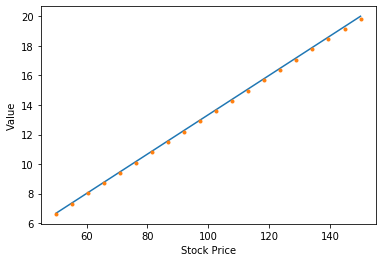

In [42]:
plt.plot(stockPrices, values)
plt.plot(stockPrices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [43]:
values = []
valuesMC = []

for stockPrice in stockPrices:
    stockMinMax = stockPrice
    v = lookbackPut.value(valueDate, stockPrice, discountCurve, dividendYield,
                           volatility, stockMinMax)
    v_mc = lookbackPut.valueMC(valueDate, stockPrice, discountCurve, dividendYield, 
                                volatility, stockMinMax, numPaths, numStepsPerYear)
    values.append(v)
    valuesMC.append(v_mc)

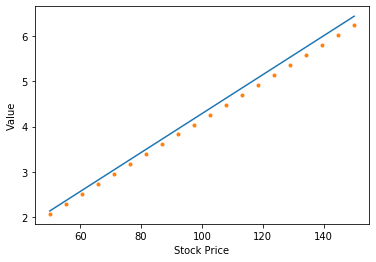

In [44]:
plt.plot(stockPrices, values)
plt.plot(stockPrices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

Copyright (c) 2020 Dominic O'Kane